## How many healthy insurers would buy a Vehicle insurance from the same company?

This problem consists in predicting what healthy insurance clients are more probably buyers of a vehicle insurance. Otherwise, the sales team of the company have a main constraint: the number of phone calls with clients are limited. How can we get the maximum sales using data analysis to help sales team contact only the best candidates of this new insurance? It´s this problem that I adress in the present study.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

%matplotlib inline
warnings.filterwarnings('ignore')

Let´s start by looking at the Dataset. There are categorical and numerical variables, thus, we´ll need to convert them into numerical types further getting dummies from them. The target column is <b>Response</b>, thus, we´re interested in explore how the other variables are related to Response and also how they´re related with each other.

In [81]:
df = pd.read_csv("train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Pulling more about the dataframe, it´s crucial to get information about it. A simple way is to use info() function...
The dataset we´re dealing with have 11 independent variable columns and 1 dependent variable column, also known as the target column. There´s not any concerns about null values and we won´t need to use data imputation here

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Now one can begin to explore the dataset and get insights about it. The first thing I´m curious about is the relationship between <b>Age</b> and <b>Vehicle Damage</b>. There´s a common sense that young people are responsible for the majority of car crashes. Let´s see below if this hypothesis hold.

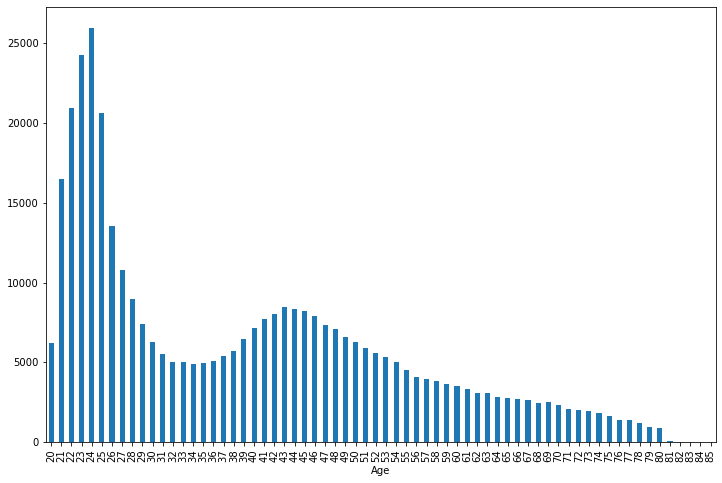

In [4]:
plt.figure(figsize=(12,8))
df.groupby('Age')['Vehicle_Damage'].count().plot(kind='bar');

We can see clearly that there´s a peak of Vehicle Damage frequency in the early twenties. But it´s not right to say that the number of car crashes decreases as the age increases. We can see another peak from the graph above showing that a second car crash frequency peak happens at 40´s. This tells us that, probably, prospects with age close to 20 and 40´s can be stronger candidates to buy the car insurance, so we might need to prioritize them on call offerings

We might as well see the frequency between male and female car crashes. There´s a strong predominance between one of this genders or just a slight difference between them? This is also a important question to answer because iif strong discrepancy happens, one must expect that the future classification model classifies more male or female as best car insurance buyers 

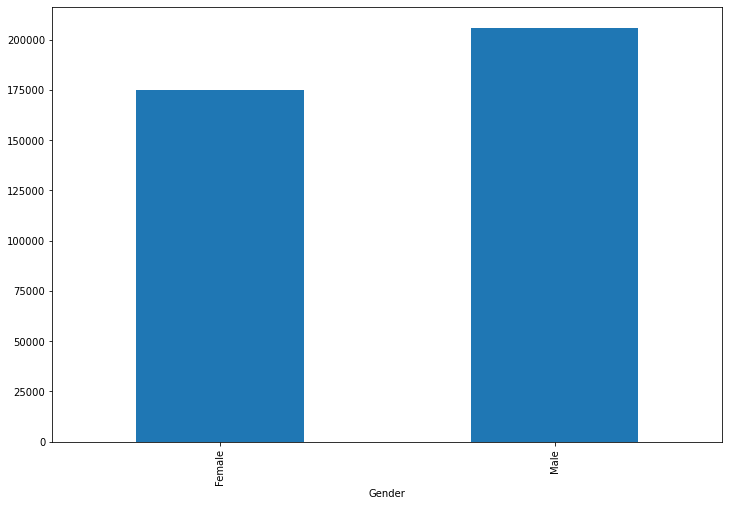

In [5]:
plt.figure(figsize=(12,8))
df.groupby('Gender')['Vehicle_Damage'].count().plot(kind='bar');

As we can see above, There´s just a small difference between gender crashes. As you likely expected before, male gender are more prone to crash a car... Otherwise, we´ve no surprises from this proportion

It´s crucial to explore the proportion of car age and disposal to get a car insurance. One might expect to see < 1 year car owners to be more likely careful with their car. I thought that it´s logic, but one can never approach a data science problem with pre validated concepts.

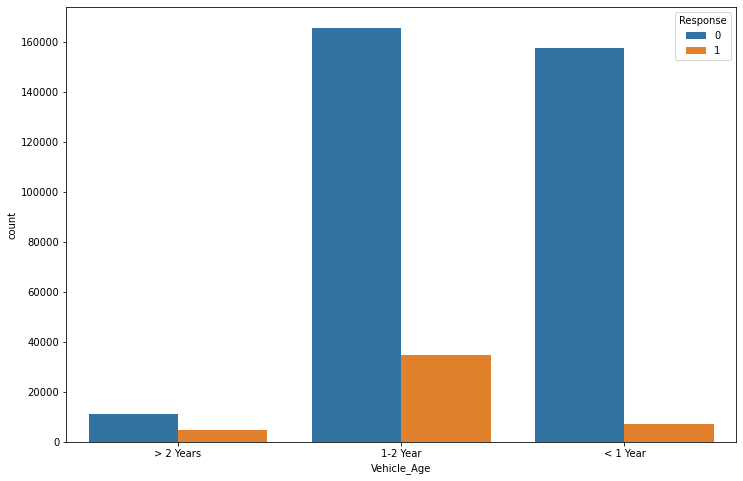

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x = df.Vehicle_Age, hue=df.Response);

As seen above, the majority of people aren´t prone to get a car insurance, even if they bought a car recently. Thus, car age is not a good variable for us to predict Responsiveness, as we expected before looking at the data.

One can get stuck about people without driving license. Let´s see in the graph below if they´re more involved in crashes.

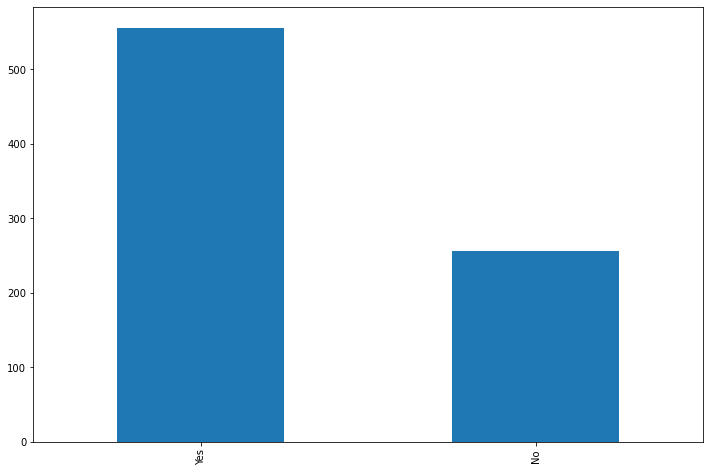

In [7]:
plt.figure(figsize=(12,8))
df[df['Driving_License'] == 0]['Vehicle_Damage'].value_counts().plot(kind='bar');

We can see that the proportion of non drivers that get involved in crashes is pretty greater than the proportion of crashes between male and female seen before. This time we´ve a good clue, except that the absolute numbers of non drivers are <b>pretty low compared to the dataset volume (381k). Therefore, we can simply neglect the non drivers impact on car damage since they´re a small group</b>

Analogous, let´s compare the proportion of car crashes between licensed drivers. Below we see that when people are legally allowed to drive, there´s no difference between their risk to be on an accident, and we can handle this issue by simply ignoring it. 

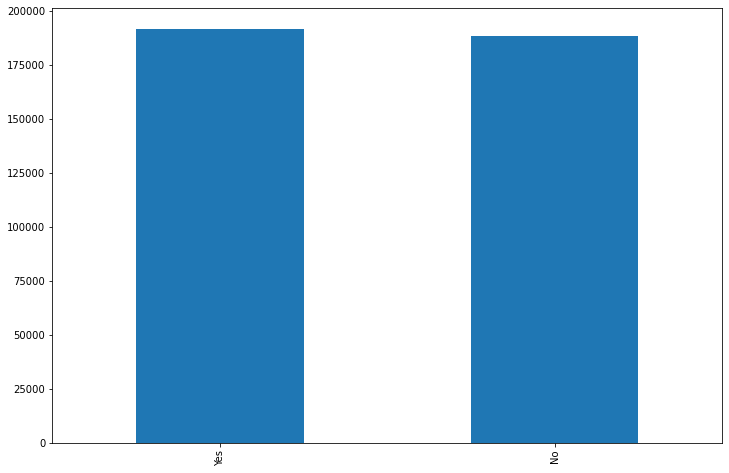

In [8]:
plt.figure(figsize=(12,8))
df[df['Driving_License'] == 1]['Vehicle_Damage'].value_counts().plot(kind='bar');

Now it´s time for us to create a separate dataframe that contains only people that are prone to get a car insurance. 

In [9]:
ideal_prospects = df[df['Response'] == 1]

The first thing I´d like to know about this dataframe is the proportion of people who got involved in a past car crash and people who never faced one. Does the previous crash impact the decision of buying a car insurance? Let´s see below

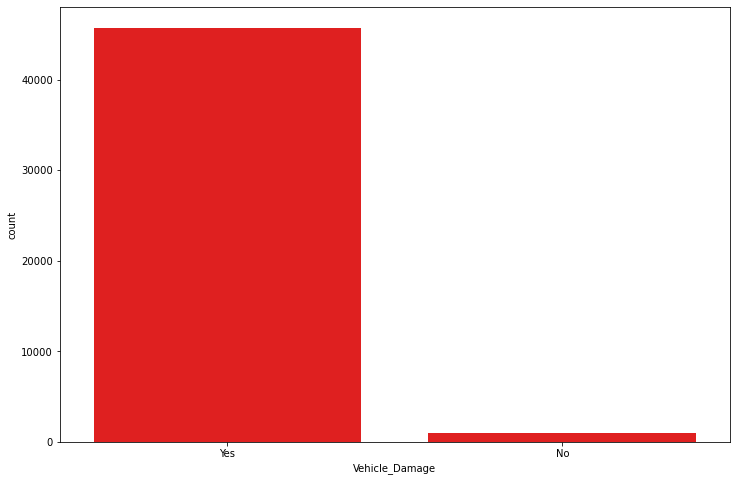

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(ideal_prospects.Vehicle_Damage, color='red');

The difference between this two groups is <b>crucial</b> to our analysis. There´s a strong imbalance between the "proneness" to get a car insurance when one have already being on a car crash. <b>Thus, our prediction model must prioritize this variable, in a way that it strongly correlates with target variable.</b>

Since our dataframe has different types of variables, we must convert the categorical ones into numerical type by dummie approach. After that, we can start working with the data to stress a good predictive model of Response that we can apply on test dataset and solve the prospects call offering problem

In [83]:
df2 = pd.get_dummies(df, drop_first=True)

In [84]:
df2.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


After the initial dataframe modification, the heatmap plot of the variable correlations below gives us a relevant information about variables: <b>Previous car damage, Age and Vehicle age > 2 years are the 3 variables that strongly correlates with Response</b>

Also, the variables that <b>negatively correlates</b> with Response are <b>Previously_Insured and Vehicle age < 1 year.</b> Curious, as we expect that recent owners should be more careful with their cars. But we trust the data, not our opinions.

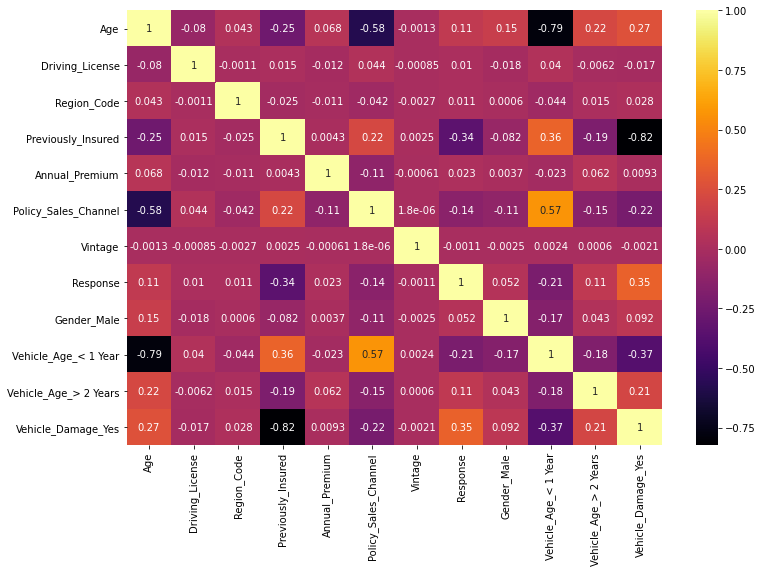

In [77]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.drop('id', axis=1).corr(), cmap='inferno', annot=True);

Time to start stressing the models. Exploratory data analysis (EDA) and data preprocessing are already done. We´re now able to split the dataset into X and y subparts.

In [85]:
X = df2[['Age', 'Previously_Insured', 'Gender_Male', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes', 'Vehicle_Age_< 1 Year']]
y = df2[['Response']]

Before we train any model, there´s still 2 steps that must be done:<b> (1) Split samples into training and validation set. (2) Normalize the X dataset, as Age values are grater than other ones. </b>

In [86]:
from sklearn.model_selection import train_test_split as tts

In [87]:
X_train, X_val, y_train, y_val = tts(X, y, test_size=.05, random_state=42)

As long as we´ve split the data into training and validation sets, let´s see the proportion of Response variable. If there´s a imbalance, it must be handled next.

Yes/Total Proportion: 12.231910797590409 %


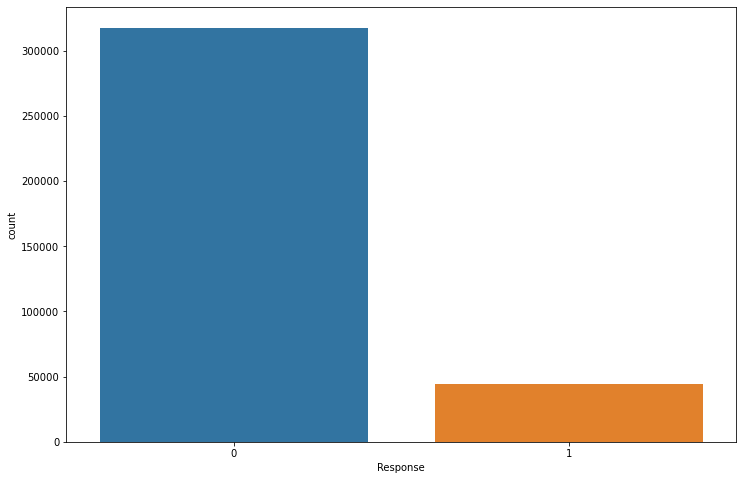

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(y_train.Response);
print ('Yes/Total Proportion:', y_train.Response.sum()*100/len(y_train), '%')

If we train a simpler classification model such as Logistic Regression imediately in this train dataset, we´ll probably get only negative predictions, as the model have few positive responses. It´s a problem that we often face when dealing with medical classification problemns like disease diagnostics.
  
  I´ll try to <b>Undersample</b> the dominant response in the train dataset aiming to get a model with a better prediction

To do it, I´ll choose to create another dataframe that´s a copy of X_train. Then, we must create a column called Response that receives the y_train dataframe. 

In [88]:
df3 = X_train.copy()

In [89]:
df3['Response'] = y_train

In [90]:
df3

,Age,Previously_Insured,Gender_Male,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Response
204642,35,0,1,0,0,0,0
13702,27,1,1,0,0,1,0
239444,21,0,0,0,1,1,0
172715,52,0,1,0,1,0,0
359760,30,1,1,0,0,0,0
...,...,...,...,...,...,...,...
259178,24,1,0,0,0,1,0
365838,56,0,1,0,1,0,0
131932,22,0,0,0,1,1,0
146867,44,1,1,0,1,0,0


Now to undersample the data we only need to import resample and call the resample function afterwards. We segregate df3 dataframe into minority class (response = 1) and majority class (response = 0) which we want to donwsample here

In [91]:
from sklearn.utils import resample

In [92]:
df3_majority = df3[df3['Response'] == 0]
df3_minority = df3[df3['Response'] == 1]

In [93]:
df3_majority_downsampled = resample(df3_majority, replace=False, n_samples = len(df3_minority), random_state=42)

Straightforward to join both dataframes, the major donwsampled and the minority one. We done it below

In [94]:
df3_downsampled = pd.concat([df3_majority_downsampled, df3_minority])

In [95]:
df3_downsampled

,Age,Previously_Insured,Gender_Male,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Vehicle_Age_< 1 Year,Response
124506,24,1,0,0,0,1,0
308243,23,1,0,0,0,1,0
180902,23,0,1,0,1,1,0
143235,23,0,0,0,1,1,0
128723,46,0,0,0,1,0,0
...,...,...,...,...,...,...,...
347449,46,0,1,0,1,0,1
321879,52,0,1,0,1,0,1
64820,30,0,1,0,1,1,1
175203,43,0,1,0,1,0,1


Let´s look at the final result of downsampling in this case. It´s worth noting that now our test dataframe have the same proportion on Response

Yes/Total Proportion: 50.0 %


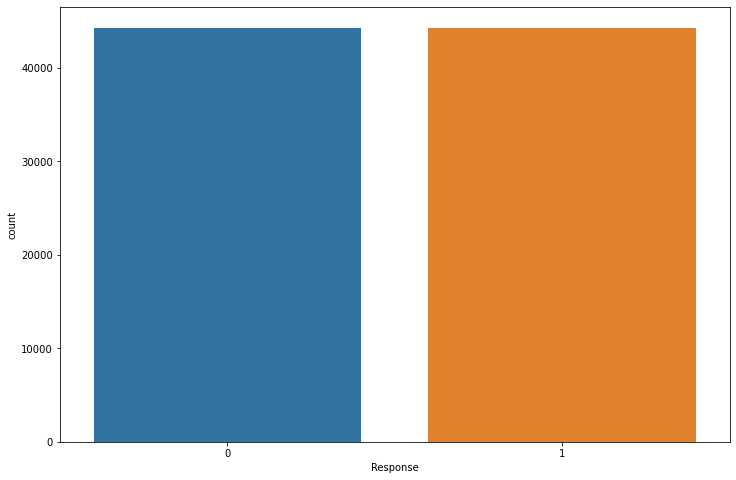

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df3_downsampled.Response);
print ('Yes/Total Proportion:', df3_downsampled.Response.sum()*100/len(df3_downsampled), '%')

Time to normalize the data with StandardScaler

In [96]:
X_train_downsampled = df3_downsampled.drop('Response', axis = 1)

In [97]:
y_train_downsampled = df3_downsampled.Response

I tried to implement Standardization of data, but I got worse results with them in this problem. I think that it can be explained as the vast majority of our variables are discrete, only Age is purely numerical.

In [29]:
#from sklearn.preprocessing import StandardScaler

In [30]:
#ss = StandardScaler()

In [31]:
#std_variablestrain = ss.fit_transform(X_train_downsampled)

In [32]:
#std_variablesval = ss.fit_transform(X_val)

Now we arrived at the third step of the project and will try different classification models to predict Response using the given attributes on X.

  We will train different models:  
<b>1 - Logistic Regression  
2 - KNN  
3 - Random Forest Classifier  
4 - Support Vector Classifier  </b>

### 1- Logistic Regression

In [98]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression()

In [100]:
logmodel.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression()

In [101]:
logmodel.score(X_val, y_val)

0.6396935348446684

In [102]:
prediction_logmodel = logmodel.predict(X_val)

Let´s evaluate the classification problem since we´re interested in the model that gives the most positive predictions, as accuracy cannot contribute to much with information as the dataset Response variable doesn´t show simillar proportion of yes and no (1 and 0)

In [38]:
from sklearn import metrics as ms

In [39]:
print (ms.classification_report(y_val, prediction_logmodel))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     16632
           1       0.26      0.98      0.41      2424

    accuracy                           0.64     19056
   macro avg       0.63      0.78      0.57     19056
weighted avg       0.90      0.64      0.70     19056



In [40]:
pd.DataFrame(ms.confusion_matrix(y_val, prediction_logmodel), index = ['Neg', 'Pos'],
            columns = ['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,9819,6813
Pos,53,2371


Logistic Regression model performed good in a way that it yielded only 53 False Negatives (FN). Remember that in this special case the main goal is to reduce de False Negatives number and raise True Positive Rate. We might as well neglect the False Positive rate, as it did not penalize us with this specific project.

### 2- K Nearest Neighbours

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)

In [43]:
knn.fit(X_train_downsampled, y_train_downsampled)

KNeighborsClassifier(n_neighbors=7)

In [44]:
prediction_knn = knn.predict(X_val)

In [45]:
knn.score(X_val, y_val)

0.7319479429051218

In [46]:
print (ms.classification_report(y_val, prediction_knn))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     16632
           1       0.29      0.79      0.43      2424

    accuracy                           0.73     19056
   macro avg       0.63      0.76      0.63     19056
weighted avg       0.87      0.73      0.77     19056



In [47]:
pd.DataFrame(ms.confusion_matrix(y_val, prediction_knn), index = ['Neg', 'Pos'],
            columns = ['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,12037,4595
Pos,513,1911


<b>KNN did worst than Logistic Regression, as it produced more False Negatives and we cannot tolerate this metric to increase. For this case, low FN rate is the main target metric</b>

### 3- Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators = 1000)

In [50]:
rfc.fit(X_train_downsampled, y_train_downsampled)

RandomForestClassifier(n_estimators=1000)

In [51]:
prediction_rfc = rfc.predict(X_val)

In [52]:
rfc.score(X_val, y_val)

0.6962636439966414

In [53]:
print (ms.classification_report(y_val, prediction_rfc))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     16632
           1       0.29      0.92      0.44      2424

    accuracy                           0.70     19056
   macro avg       0.63      0.79      0.61     19056
weighted avg       0.89      0.70      0.75     19056



In [54]:
pd.DataFrame(ms.confusion_matrix(y_val, prediction_rfc), index = ['Neg', 'Pos'],
            columns = ['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,11030,5602
Pos,186,2238


### 4- SVC with Linear Kernel

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC(kernel='linear')

In [57]:
svc.fit(X_train_downsampled, y_train_downsampled)

SVC(kernel='linear')

In [58]:
prediction_svc = svc.predict(X_val)

In [59]:
svc.score(X_val, y_val)

0.6397460117548279

In [60]:
print (ms.classification_report(y_val, prediction_svc))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     16632
           1       0.26      0.98      0.41      2424

    accuracy                           0.64     19056
   macro avg       0.63      0.78      0.57     19056
weighted avg       0.90      0.64      0.70     19056



In [61]:
pd.DataFrame(ms.confusion_matrix(y_val, prediction_svc), index = ['Neg', 'Pos'],
            columns = ['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,9816,6816
Pos,49,2375


In [62]:
y_val.sum()

Response    2424
dtype: int64

## How should we interpret the results?

Clearly, we see that all the 4 models employed yielded "bad" results if we only look at metrics in a traditional way. I did not even talked about accuracy here, cause I think it´s pretty notable to see that accuracy is the worst metric to look at in this problem. But something interesting arises when we stop to think deeply about this problem. Let´s recap some issues about it:

<b>(1) The main insights that we´ve got about the data was that Age, Previous car crash, owning the vehicle for more than 2 years and Previously insured were the main variables that correlates to Response</b>  
<b>(2) Our goal is to predict who are the best prospects for a cold call offering the new product of the company: car insurance for their clients. So we must choose the classification model that yields MORE positive predictions on the validation set. This way, we can chose the best prospects to give our limited calls.</b>

With this idea in mind, we may start to work with the test database and start doing predictions of Response with the Logistic Regression model. I chose this model because it yielded almost the same low FN rate as SVC (only 4 more) but with a much more simple, fast and robust algorithm. So, we must wait it to yield a more sensible Response prediction on test dataset

<b>Now we just need to make predictions on test database and create a new column Response, the same one as in train set. We must keep prospect id´s in a way that comercial team can contact them right after our prediction is done.</b>
  
  Everything else is analogous as what we did before in this study. The problem is already done!

In [63]:
df_test = pd.read_csv('test.csv')
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [64]:
df_ex_id = df_test.drop('id', axis=1)
df_ex_id

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [65]:
df_ex_id = pd.get_dummies(df_ex_id, drop_first=True)

In [66]:
df_ex_id

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,25,1,11.0,1,35786.0,152.0,53,1,1,0,0
1,40,1,28.0,0,33762.0,7.0,111,1,0,0,1
2,47,1,28.0,0,40050.0,124.0,199,1,0,0,1
3,24,1,27.0,1,37356.0,152.0,187,1,1,0,1
4,27,1,28.0,1,59097.0,152.0,297,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
127032,26,1,37.0,1,30867.0,152.0,56,0,1,0,0
127033,38,1,28.0,0,28700.0,122.0,165,0,0,0,1
127034,21,1,46.0,1,29802.0,152.0,74,1,1,0,0
127035,71,1,28.0,1,62875.0,26.0,265,1,0,0,0


In [67]:
Xx = df_ex_id[['Age', 'Previously_Insured', 'Gender_Male', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes', 'Vehicle_Age_< 1 Year']]
predict_test_svc = svc.predict(Xx)

In [68]:
df_test['Response'] = predict_test_svc

In [69]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,1
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,1
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,1
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [70]:
print ('-'*50)
print ('N° of possible car insurance buyers: ', df_test.Response.sum())
print ('-'*50)

--------------------------------------------------
N° of possible car insurance buyers:  60537
--------------------------------------------------


As we have seen above, the total number os possible buyers is 60k. But we have a constraint: 20k calls. How we deal with it?

## Questions:

1 - What´s the percentage of clients with possible interest in car insurance does sales team can contact with only 20.000 phone calls?  

 **<b>Answer: The sales team can contact approx 33,3% (20k/60k) prospects</b>
 
2 - If we raise the limit to 40k calls? What that percentage would be?  

 **<b>Answer: Sales team could call approx 66,6% of the interested ones</b>
 
3 - How many calls would we need on the company to contact 80% of the interested ones?  

 **<b>Answer: We´d need about 48.430 calls to cover 80% of them
    
 <b>Another relevant strategies that could be employed by the sales team is to use another variable (like Vintage) to rank clients with predicted Response = 1 in a way that they have priority over the others. More relevant strategies to increase car insurance sales can be thought in this way. Our main goal was achieved, we´ve solved the question and now one have a list os possible buyers and some ideas to implement on the sales team</b> 

Now I´ll convert the fitted logmodel using pickle to make model deploying

In [79]:
pickle.dump(logmodel, open('logmodel.pkl', 'wb'))